In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nibabel as nib

In [11]:
def wasserstein(mu1, var1, mu2, var2):
    return np.sqrt(
        ( mu1 - mu2 )**2 + ( np.sqrt(var1) - np.sqrt(var2) )**2
    )

In [3]:
file = nib.load('../../../Data/OpenfMRI/ds000115_R2.0.0/sub-02/func/sub-02_task-letter0backtask_bold.nii.gz')
image = file.get_fdata()

In [4]:
imageResized = image.reshape((-1,image.shape[3]))

In [5]:
mean = np.mean(imageResized, axis=0)
variance = np.var(imageResized, axis=0)
std = np.sqrt(variance)

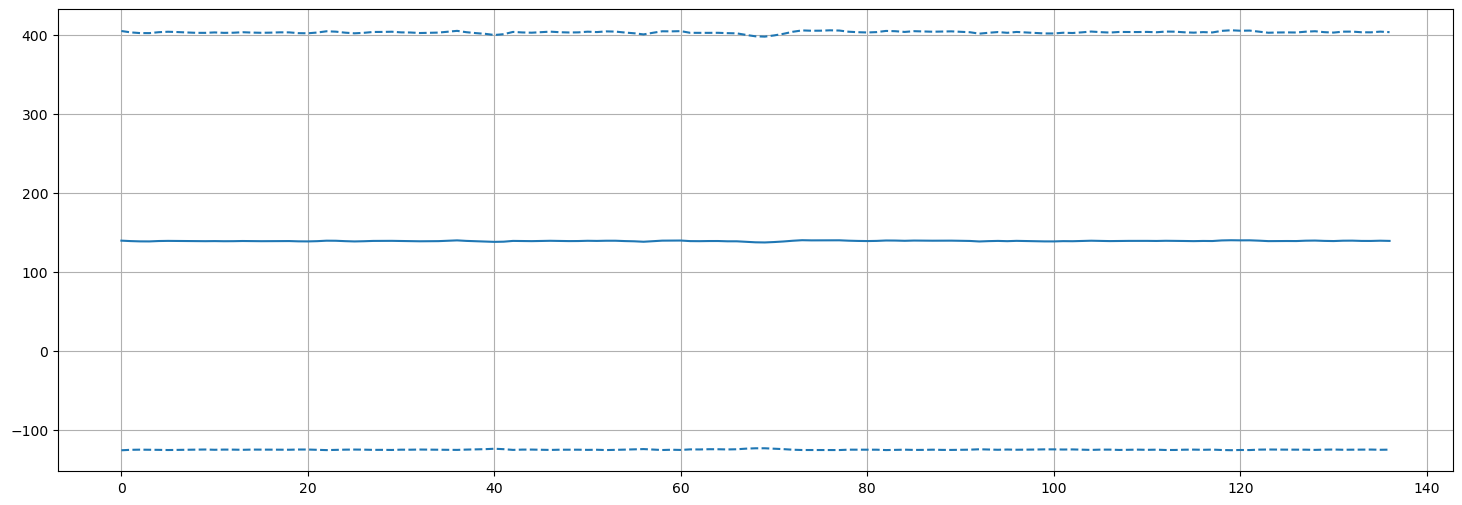

In [6]:
plt.figure(figsize=(18,6))
plt.plot(mean)
plt.plot(mean - std, c='tab:blue', ls='dashed')
plt.plot(mean + std, c='tab:blue', ls='dashed')
plt.grid()
plt.show()

In [12]:
distances = [
    wasserstein(mu1, var1, mu2, var2) 
    for mu1,var1,mu2,var2 
    in zip(mean[5:-1], variance[5:-1], mean[5+1:], variance[5+1:])
]

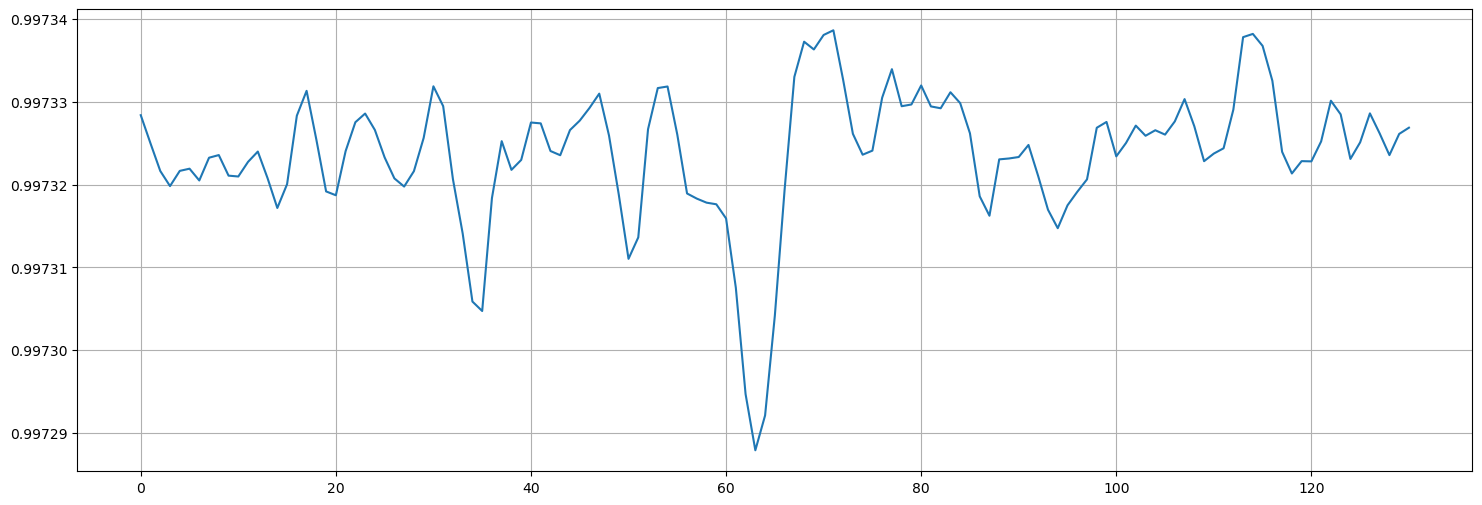

In [13]:
plt.figure(figsize=(18,6))
plt.plot(distances)
plt.grid()
plt.show()